In [3]:
# Import required library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data as pdr
import datetime


# from pandas_datareader.data import DataReader
import yfinance as yf

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

yf.pdr_override()
from datetime import datetime
print("Load lib is OK")


Load lib is OK


In [36]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 3, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]


for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(100)









[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-02-01,133.750000,135.380005,130.929993,134.139999,131.812088,106239800,APPLE
2021-02-02,135.729996,136.309998,134.610001,134.990005,132.647293,83305400,APPLE
2021-02-03,135.759995,135.770004,133.610001,133.940002,131.615540,89880900,APPLE
2021-02-04,136.300003,137.399994,134.589996,137.389999,135.005692,84183100,APPLE
2021-02-05,137.350006,137.419998,135.860001,136.759995,134.587402,75693800,APPLE
...,...,...,...,...,...,...,...
2021-06-17,129.800003,132.550003,129.649994,131.789993,129.916672,96721700,APPLE
2021-06-18,130.710007,131.509995,130.240005,130.460007,128.605576,108953300,APPLE
2021-06-21,130.300003,132.410004,129.210007,132.300003,130.419418,79663300,APPLE


In [13]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-01-31 to 2024-01-31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


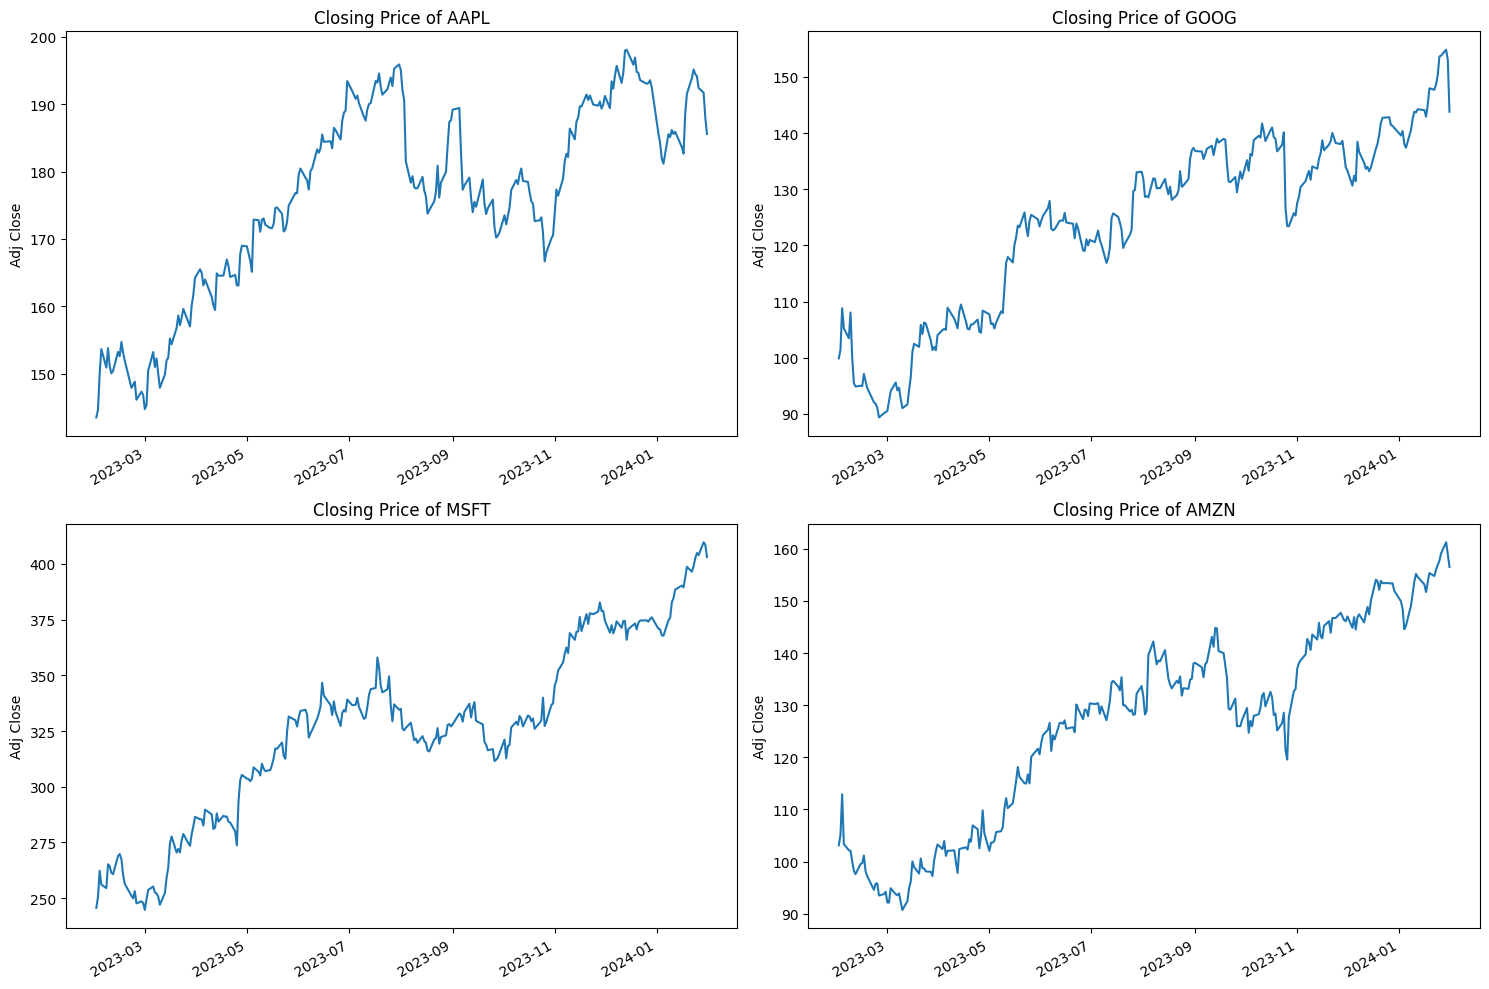

In [14]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

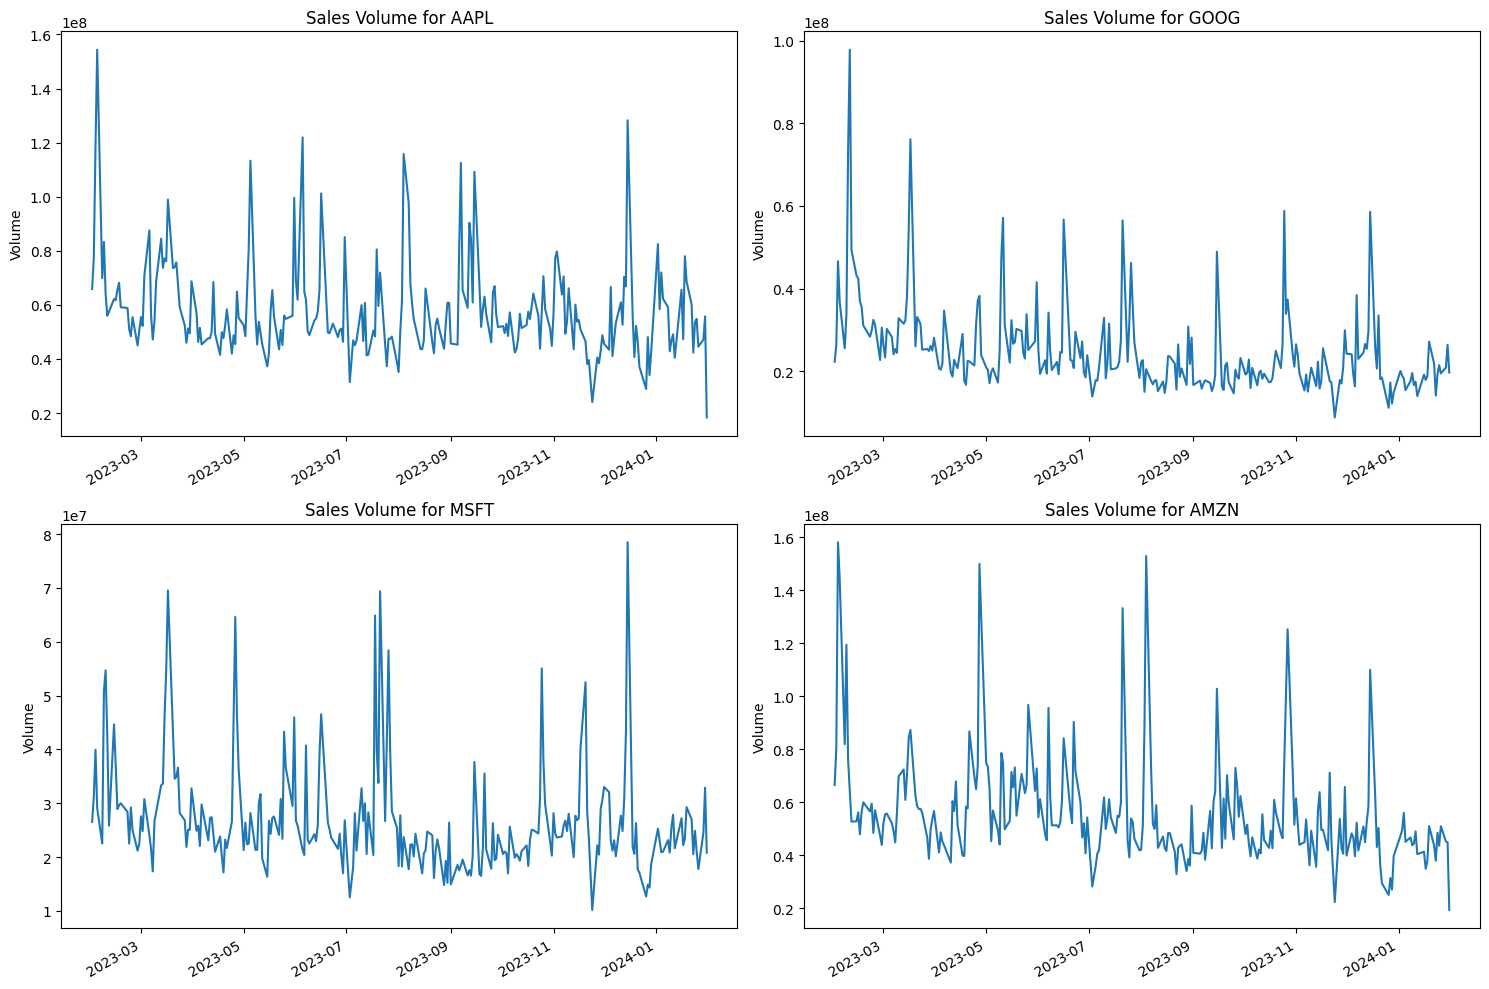

In [15]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

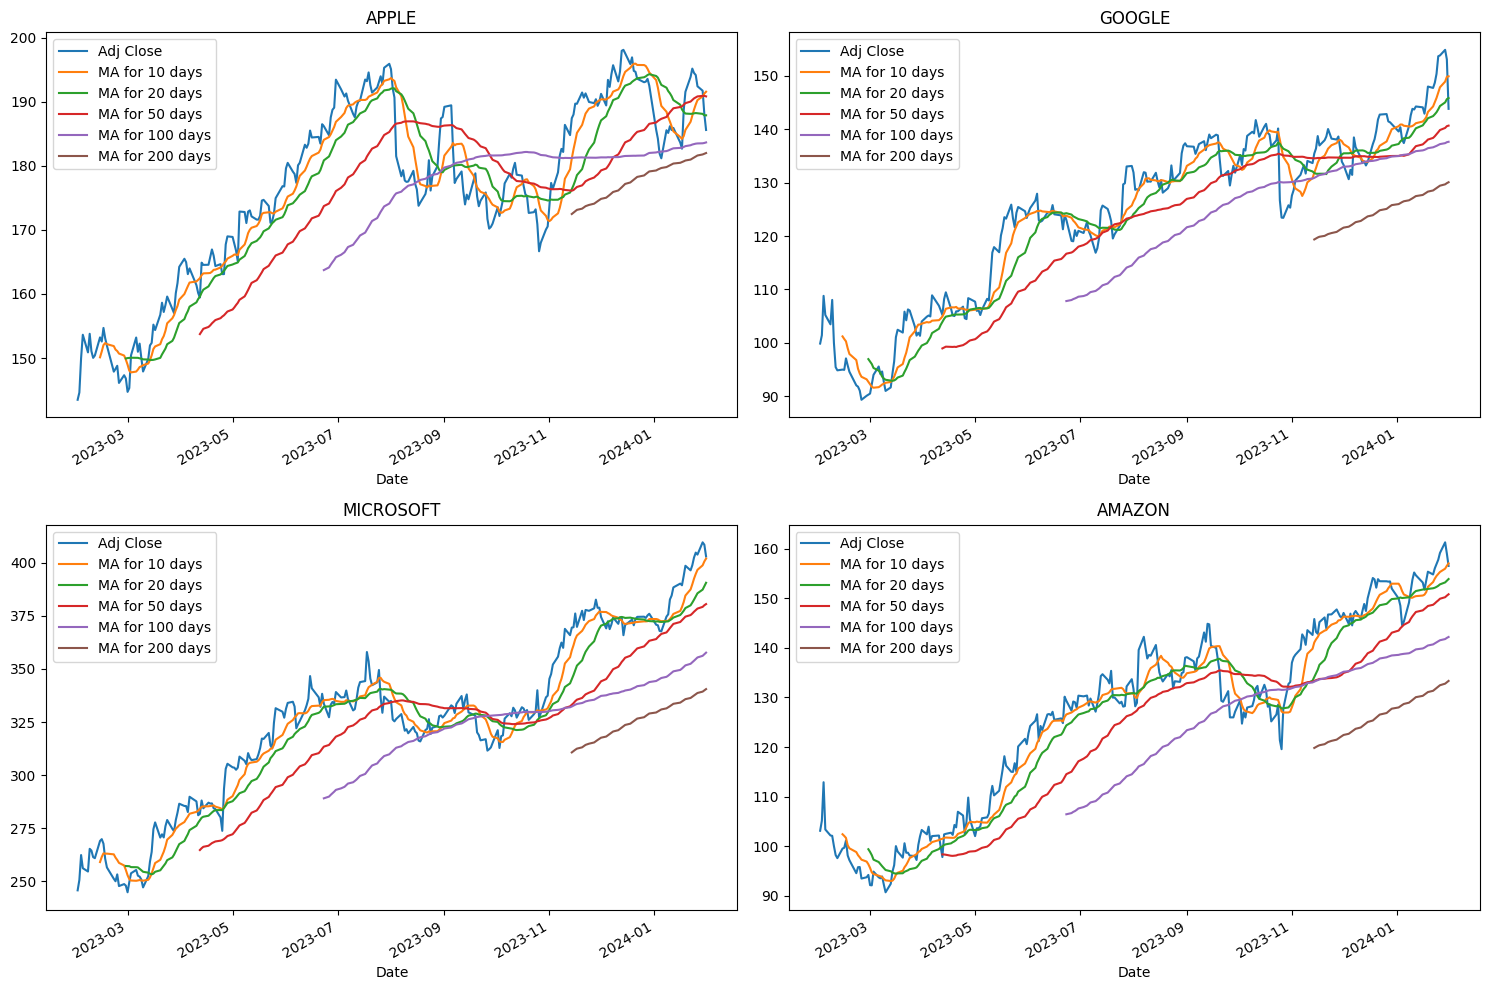

In [21]:
ma_day = [10, 20, 50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

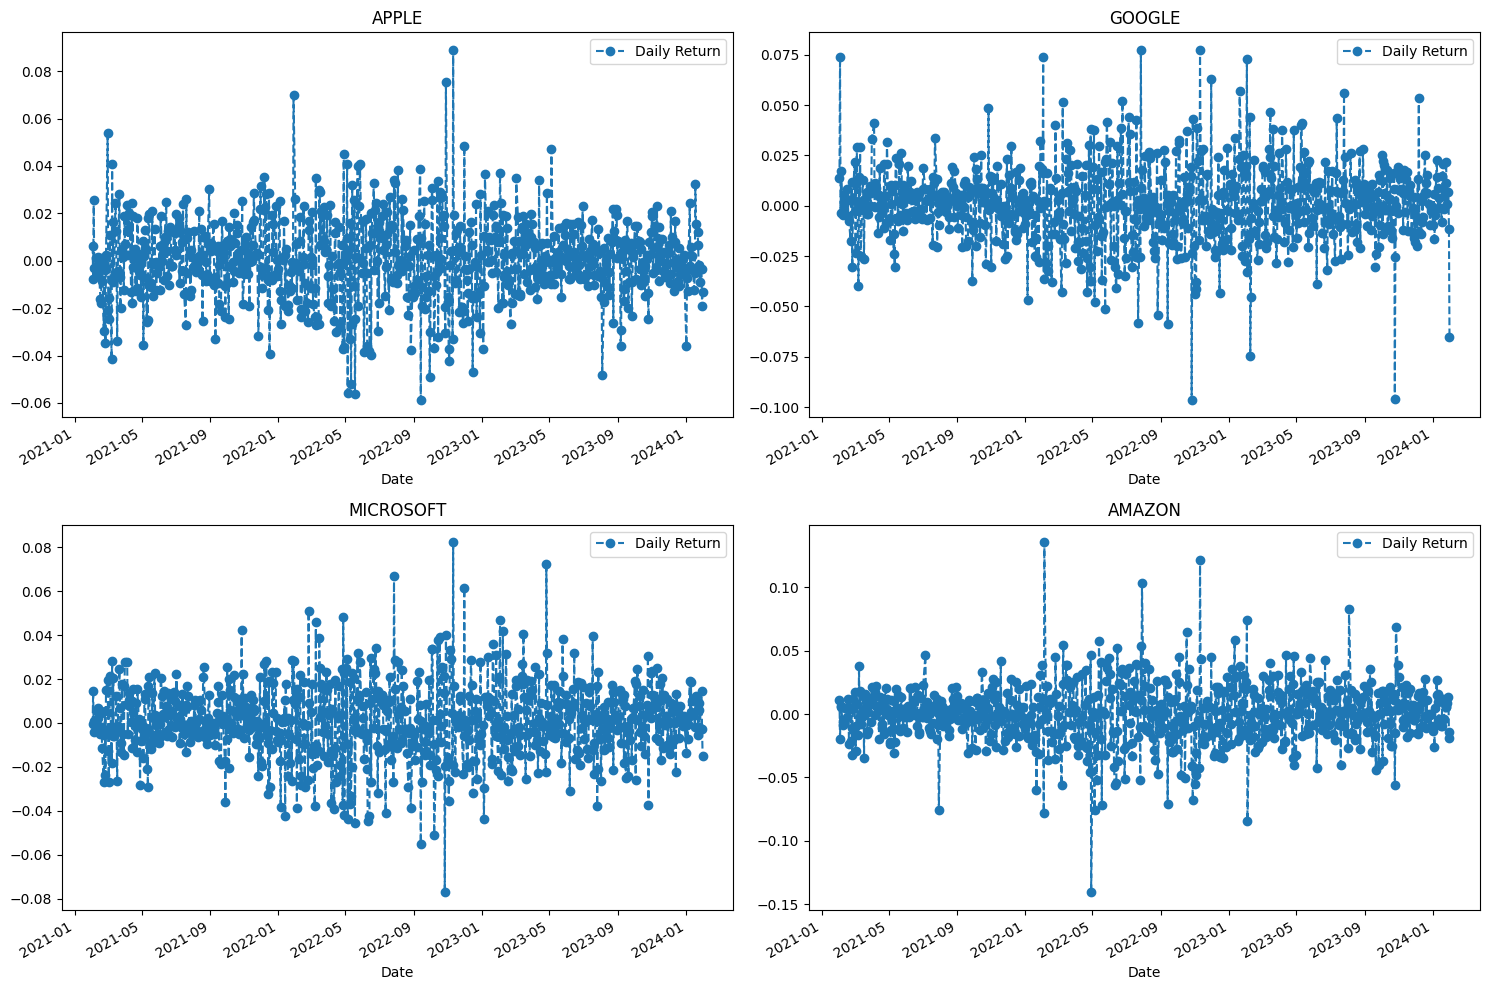

In [25]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

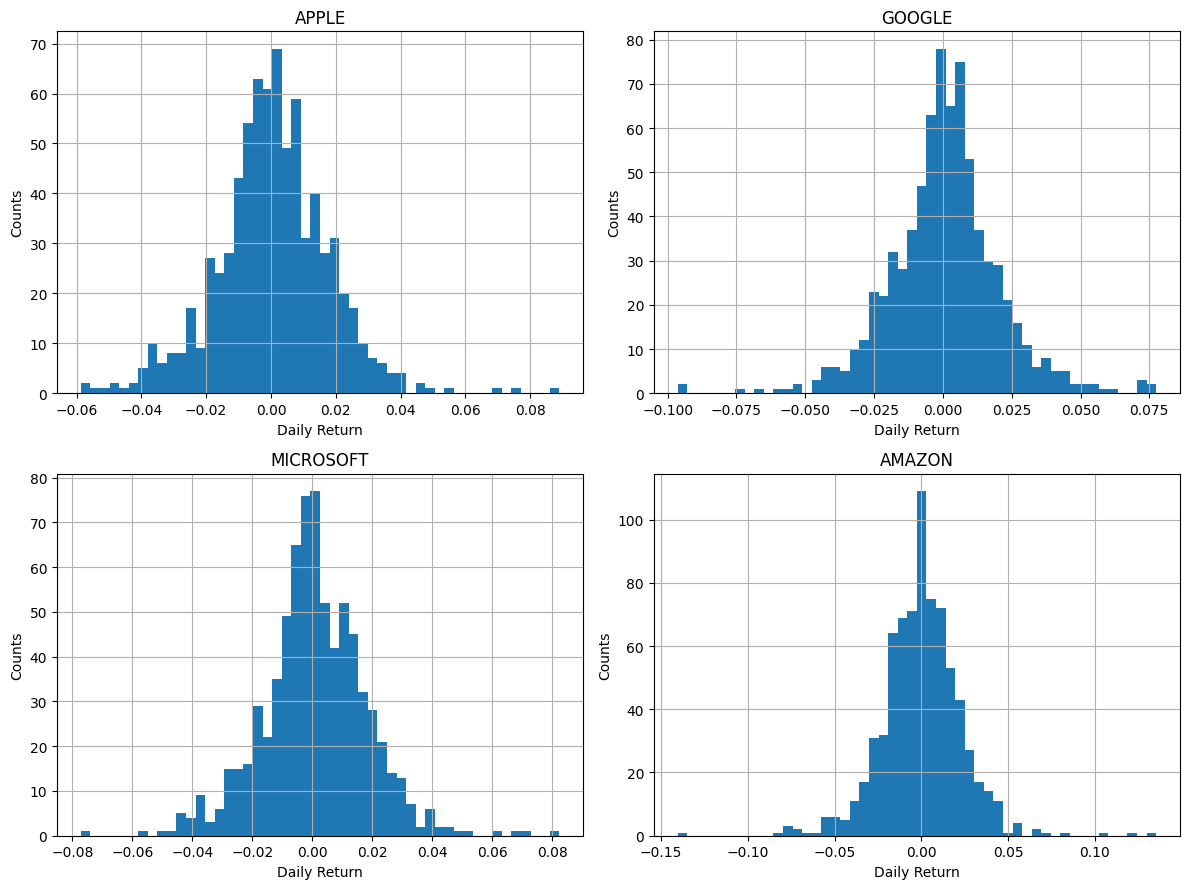

In [26]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [41]:
# Grab all the closing prices for the tech stock list into one DataFrame
# 
closing_df = pdr.get_data_yahoo(company_list, start=start, end=end)['Adj Close']
# 
# # Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
# tech_rets.head()
# sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')


/Users/thuanvu/PycharmProjects/AnalysisMarket/venv/lib/python3.11/site-packages/pandas_datareader/base.py:272: SymbolWarning: Failed to read symbol:                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-02-01  133.750000  135.380005  130.929993  134.139999  131.812088   
2021-02-02  135.729996  136.309998  134.610001  134.990005  132.647293   
2021-02-03  135.759995  135.770004  133.610001  133.940002  131.615540   
2021-02-04  136.300003  137.399994  134.589996  137.389999  135.005692   
2021-02-05  137.350006  137.419998  135.860001  136.759995  134.587402   
...                ...         ...         ...         ...         ...   
2024-01-25  195.220001  196.270004  193.110001  194.169998  194.169998   
2024-01-26  194.270004  194.759995  191.940002  192.419998  192.419998   
2024-01-29  192.009995  192.199997  189.580002  191.729996  191.729996   
2024-01-30  190.940002  191.800003  1

RemoteDataError: No data fetched using 'YahooDailyReader'

In [38]:
# rets = tech_rets.dropna()
# 
# area = np.pi * 20
# 
# plt.figure(figsize=(10, 8))
# plt.scatter(rets.mean(), rets.std(), s=area)
# plt.xlabel('Expected return')
# plt.ylabel('Risk')
# 
# for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
#     plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
#                  arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

NameError: name 'tech_rets' is not defined

[*********************100%%**********************]  1 of 1 completed


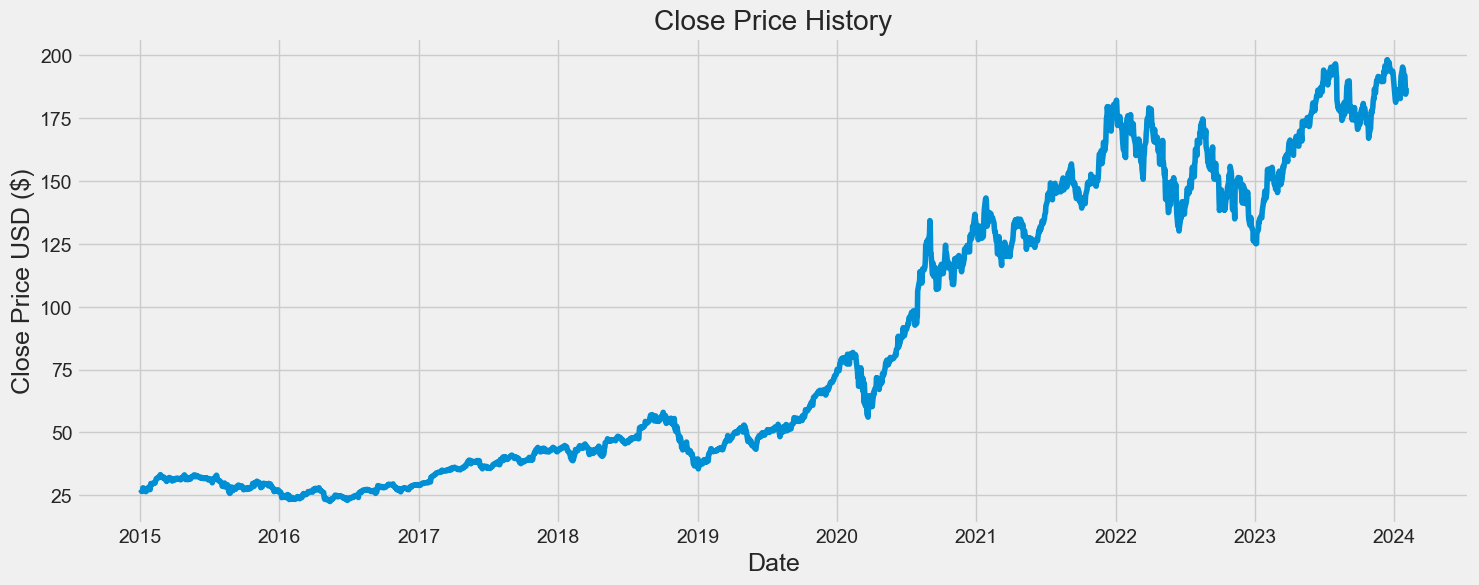

In [7]:
# Get the stock quote
from datetime import datetime

df = pdr.get_data_yahoo("AAPL", start="2015-01-01", end=datetime.now())

# Show teh data
df
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2172

In [9]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02704744],
       [0.02266059],
       [0.02267484],
       ...,
       [0.94262921],
       [0.92189143],
       [0.93590657]])

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.02704744, 0.02266059, 0.02267484, 0.02479704, 0.03069364,
       0.03086456, 0.02693349, 0.02831506, 0.02771686, 0.02347244,
       0.02229027, 0.02617861, 0.02736078, 0.03142003, 0.03224613,
       0.03241704, 0.02677682, 0.03556474, 0.04067797, 0.0381997 ,
       0.04029341, 0.0403219 , 0.041618  , 0.04215924, 0.0407207 ,
       0.0418459 , 0.04512178, 0.04919527, 0.05144567, 0.05232874,
       0.05339696, 0.05466458, 0.05428002, 0.05577554, 0.06076058,
       0.05957841, 0.05476427, 0.05708589, 0.05429427, 0.05519157,
       0.05557613, 0.0544082 , 0.05137446, 0.05164507, 0.05241419,
       0.04866829, 0.04543512, 0.04858282, 0.04735793, 0.04929497,
       0.05227176, 0.05430851, 0.05292694, 0.05064806, 0.05251389,
       0.05177326, 0.04705882, 0.04828372, 0.04687367, 0.05131748])]
[0.04855434221753735]

[array([0.02704744, 0.02266059, 0.02267484, 0.02479704, 0.03069364,
       0.03086456, 0.02693349, 0.02831506, 0.02771686, 0.02347244,
       0.02229027, 0.02617861, 0.02

In [14]:
!pip install -q keras
!pip install -q tensorflow
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)